# Assignment 3 - Transformer Implemention with Andrej Karpathy 

## Instructions

1.	Watch the following tutorial by Andrej Karpathy (https://twitter.com/karpathy):
        a.	https://www.youtube.com/watch?v=kCc8FmEb1nY
        b.	As you are watching, run the code yourself (preferably on a fresh notebook).
        c.	You can download a copy of his notebook from here:
            i.	https://colab.research.google.com/drive/1JMLa53HDuA-i7ZBmqV7ZnA3c_fvtXnx-?usp=sharing
            ii.	Make sure you can run this notebook from start to finish!
        d.	You can also check out a cleaner version of the code here:
            i.	https://github.com/karpathy/ng-video-lecture

## What is a language model?

A language model is an advanced computer program trained on vast amounts of text data. It can understand and generate human language, making it a valuable tool for various applications. By analyzing patterns and relationships in language, it predicts words, completes sentences, and generates coherent text. Language models improve language translation, aid in writing tasks, and power voice assistants and chatbots. They enhance our interactions with technology and enable more efficient communication in the digital age.

## Data Description

In [1]:
# Fetching dataset from Karpathy's repo

!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2023-06-10 08:50:57--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.02s   

2023-06-10 08:50:57 (44.9 MB/s) - ‘input.txt’ saved [1115394/1115394]



In this project, we're working with a special dataset that features a handpicked selection of works by none other than the legendary playwright, William Shakespeare. It's like diving into a treasure trove of scripts from various plays and literary masterpieces penned by Shakespeare himself. This dataset holds a special place in the heart of Karpathy, one of the brilliant minds in the field, and it's a popular choice for tackling all sorts of exciting natural language processing (NLP) challenges.

## Data Pre-processing

Here's a breakdown of the key steps involved in this process:

1. First, we create a sorted list of unique characters, which serves as a reference for our vocabulary. It helps us keep track of all the distinct characters present in our data.

2. Next, we determine the size of the vocabulary, which in turn sets the embedding size. This step ensures that our model has the right dimensions to handle the data effectively.

3. We create two dictionaries: `stoi` (string to integers) and `itos` (integer to string). These dictionaries establish a mapping between characters and integers, allowing us to easily convert text into numerical representations and vice versa.

4. The `encode` and `decode` functions make use of these dictionaries. The `encode` function takes a string as input and converts it into a list of corresponding integers using the `stoi` dictionary. On the other hand, the `decode` function takes a list of integers and converts it back into a string using the `itos` dictionary.

5. Finally, we split the dataset into train and test sets based on the length of the encoded data. The training set contains 90% of the data, while the test set contains the remaining 10%. This split allows us to evaluate the performance of our model on unseen data.

These steps are essential for setting up the necessary mappings between characters and integers, providing functions for encoding and decoding, and preparing the data for further processing and modeling tasks.

In [3]:
# Loading the content of the file and counting total characters

with open('input.txt', 'r', encoding='utf-8') as f: 
    text = f.read()
print(f'len of dataset in characters: {len(text)}')

len of dataset in characters: 1115394


In [4]:
# Viewing first 1000 lines of the dataset

print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [5]:
# Get all unique characters sort it and its total len

chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [6]:
"""
    Initialization of String-to-Integer and Integer-to-String Dictionaries: 
    Initializing dictionaries to map each character to its corresponding index 
    and each index to its corresponding character. 

    Definition of encode and decode functions: 
    Defining functions to convert the text and list of integers into their 
    respective indexed values.
"""

stoi = {ch:i for i, ch in enumerate(chars)}
iots = {i:ch for i, ch in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([iots[i] for i in l])

print(encode("hi there!"))
print(decode(encode("hi there!")))

[46, 47, 1, 58, 46, 43, 56, 43, 2]
hi there!


In [7]:
#Encoding of the whole dataset and conversion to tensor object

import torch
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000])

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [10]:
# Splitting the dataset into train (90%) and test (10%) splits.
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

In [11]:
# We never gonna feed the entire text all at once
# Only work with chunks of the dataset through maximum length -- block size
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [12]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [13]:
"""
    Karpathy demonstrated and explained how the dataset is prepared for 
    training explained here that each sequence of data has maximimum of 8 
    tokens as the block_size is 8 and 4 rows for each batch. This is shown
    as the architecture can process matrices in parallel independent of each
    other as we've also discussed in class.
"""

torch.manual_seed(1337)
batch_size = 4
block_size = 8

def get_batch(split):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): #batch dimension
    for t in range(block_size): #time dimension
        context = xb[b, :t+1]
        target = yb[b, t]
        print(f"when input is {context.tolist()} the taget: {target}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the taget: 43
when input is [24, 43] the taget: 58
when input is [24, 43, 58] the taget: 5
when input is [24, 43, 58, 5] the taget: 57
when input is [24, 43, 58, 5, 57] the taget: 1
when input is [24, 43, 58, 5, 57, 1] the taget: 46
when input is [24, 43, 58, 5, 57, 1, 46] the taget: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the taget: 39
when input is [44] the taget: 53
when input is [44, 53] the taget: 56
when input is [44, 53, 56] the taget: 1
when input is [44, 53, 56, 1] the taget: 58
when input is [44, 53, 56, 1, 58] the taget: 46
when input is [44, 53, 56, 1, 58, 

In [14]:
"""
    This is the initial version of the BigramLanguageModel, where Karpathy 
    explained the shapes of B (batch_size), T (sequence length), and C 
    (channels/vocab_size). We discussed how logits-softmax works, which is the 
    same explanation we had in class. We also calculated the loss using 
    cross_entropy when the target is defined, as it measures the dissimilarity 
    between the predicted probability distribution over classes (our vocabulary) 
    and the true distribution (target token).
"""

import torch
import torch.nn as nn
from torch.nn import functional as F

torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):
        """
        Forward pass of the BigramLanguageModel.
        
        Args:
            idx (torch.Tensor): Input tensor of shape (B, T) representing the indices of tokens.
            targets (torch.Tensor): Target tensor of shape (B, T) representing the indices of target tokens.
        
        Returns:
            logits (torch.Tensor): Logits tensor of shape (B, T, C) representing the predicted scores for each token.
            loss (torch.Tensor or None): Loss tensor if targets are provided, else None.
        """
        logits = self.token_embedding_table(idx)  # (B, T, C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B * T, C)
            targets = targets.view(B * T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        """
        Generate new tokens based on the input sequence.

        Args:
            idx (torch.Tensor): Input tensor of shape (B, T) representing the indices of tokens.
            max_new_tokens (int): Maximum number of new tokens to generate.

        Returns:
            idx (torch.Tensor): Generated tensor of shape (B, T+max_new_tokens) representing the updated sequence.
        """
        for _ in range(max_new_tokens):
            logits, loss = self(idx)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx


m = BigramLanguageModel(vocab_size)
print(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)


# Initiate idx with a 1,1 tensor to kick_off the generation of 100 new tokens
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))

65
torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


In [15]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [17]:
batch_size = 32
for steps in range(1000): # increase number of steps for good results... 
    
    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())

3.6380467414855957


In [18]:
# Quality is still pretty bad but better than the initial output
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


gCv,XatYgGf bsAm'PADUvk!ukOET;humVz&fsJgCJMERSTMkW.IV;Bk't?ERN q-.g Ybrw'BSKd&YNYHA,iy ixl;gRnpGNIIgCH&'woc; ;AUVlxagGJM
oKkWNf?EH-
:CxOhPQFllSP!BOjKBBAQymyqMliPdFot;:q-wJ&
fxa!BHBiabvvKIVzM:CAWheht$g
GFd&jFnDCEXDuUVKootgUGF!aPxTph:C mOy.d?Cu!?z3SgYUK:CIU?mnlV&y.nQ'd zfs$IJzPO Ax; zwf-imlatNHA.ZGlysuRPyiyieH'X'zLoocUztowMcf'myeD.Dqmyk$. dsnlivRCxnnmasxiRSm,FERM?lIEKaPvriqZY?nQlcR: OMH-Ku-la!SKNT?Rj?d,i.,SP swbcObZpYUD3De,ir nsfRju-wU,
Fk-?wfritysV;.nQ?OgQwoT&T:qKAUz-thzkptyFd,sBORp'Ard
oCVJjeUGN


In [19]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [20]:
torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time, channels
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [21]:
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t,C)
        xbow[b,t] = torch.mean(xprev, 0)

In [27]:
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)
xbow2 = wei @ x #(B, T, T) @ (B, T, C) -----> (B, T, C)
print(torch.allclose(xbow, xbow2))
print(xbow[0], xbow2[0])

True
tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]]) tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])


In [28]:
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T, T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x

print(torch.allclose(xbow, xbow3))
print(xbow[0], xbow2[0])

True
tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]]) tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])


In [29]:
# version 4: self-attention!
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# let's see a single Head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16)
q = query(x) # (B, T, 16)
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)

tril = torch.tril(torch.ones(T, T))
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v
#out = wei @ x

out.shape

torch.Size([4, 8, 16])

In [30]:
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

In [32]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [33]:
k.var()

tensor(1.0449)

In [34]:
wei.var()

tensor(1.0918)

In [35]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5]), dim=-1)

tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])

In [36]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])*8, dim=-1)

tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])

In [37]:
class LayerNorm1d: # (used to be BatchNorm1d)
    """
    Custom implementation of Layer Normalization for 1D input.
    """

    def __init__(self, dim, eps=1e-5, momentum=0.1):
        self.eps = eps
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)

    def __call__(self, x):
        """
        Forward pass of LayerNorm1d.
        """
        xmean = x.mean(1, keepdim=True)  # Calculate batch mean
        xvar = x.var(1, keepdim=True)  # Calculate batch variance
        xhat = (x - xmean) / torch.sqrt(xvar + self.eps)  # Normalize to unit variance
        self.out = self.gamma * xhat + self.beta
        return self.out

    def parameters(self):
        """
        Return the parameters of the LayerNorm1d module.
        """
        return [self.gamma, self.beta]

torch.manual_seed(1337)
module = LayerNorm1d(100)
x = torch.randn(32, 100)  # Batch size 32 of 100-dimensional vectors
x = module(x)
print(x.shape)
x


torch.Size([32, 100])


tensor([[ 0.1335, -0.1059, -0.3824,  ..., -1.3422, -0.1971,  0.8795],
        [-0.0353, -0.7439, -0.3371,  ..., -0.6276, -0.4846,  0.4556],
        [ 0.3069, -1.5010,  1.4898,  ..., -0.6819,  0.9993,  0.8382],
        ...,
        [-1.6080, -1.6324, -0.7634,  ..., -0.9847,  0.0039, -0.8610],
        [-0.2273,  0.0066, -0.2763,  ..., -0.8705, -1.2442, -0.7531],
        [ 0.3054, -0.1505, -0.3809,  ..., -1.4962, -0.7711, -1.0681]])

## What is self-attention?

Self-attention is a mechanism used in deep learning models, particularly in natural language processing. It allows the model to weigh the importance of different elements in a sequence by learning their relationships. Unlike traditional models, self-attention enables each element to directly consider all other elements, capturing long-range dependencies effectively. It works by computing attention scores between elements based on their queries and keys, and using these scores to combine the values and create a representation. This helps the model understand contextual information and identify important elements within the sequence. Self-attention has been successful in tasks like machine translation and text generation.

## Compare and contrast the concept of attention, self-attention, and cross-attention.

Attention: It is a mechanism that assigns weights to different elements in a sequence based on their relevance to a specific element. It allows the model to focus on important elements while processing the sequence.

Self-attention: It is a specific type of attention mechanism where elements within the same sequence attend to each other. Each element computes its own attention weights based on its relationships with other elements in the sequence. Self-attention helps capture dependencies and long-range dependencies within the sequence.

Cross-attention: It is an extension of attention where elements from one sequence attend to elements from another sequence. This mechanism is useful when dealing with tasks that involve multiple sequences or when capturing relationships between different parts of the input.

## What is multi-head attention? 

In deep learning, "multi-head attention" refers to the concept of having multiple attention mechanisms, called "heads," working independently to focus on different parts of the input sequence. It extends the basic attention mechanism by using multiple heads simultaneously, each learning different representations of the input. The outputs from the individual heads are combined to create a final representation.

This technique allows the model to capture diverse types of information and dependencies in the input. By employing multiple heads, the model can attend to different aspects or perspectives of the input at the same time, enabling it to extract meaningful information and capture complex relationships. Multi-head attention provides the model with the ability to leverage various attention patterns and learn more expressive representations. It has proven effective in various tasks, such as machine translation and language modeling.

## What is a transformer?

A transformer is a powerful deep learning model designed for natural language processing tasks. It uses self-attention to understand the relationships between words in a sentence, allowing it to consider context and dependencies effectively. Unlike traditional models, transformers can process input in parallel, making them efficient. They have achieved impressive results in tasks like translation, summarization, and question answering, transforming the field of NLP with their ability to capture context and handle long-range dependencies.

### Transformer Showcase

### Setting the transformer

In [22]:
import torch
import torch.nn as nn
from torch.nn import functional as F

def nano_GPT (batch_size=16, block_size=32, max_iters=5000, eval_interval=100,
              learning_rate=1e-3, eval_iters=200, n_embd=64, n_head=4,
              n_layer=4, dropout=0.0):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    torch.manual_seed(1337)

    # wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
    with open('input.txt', 'r', encoding='utf-8') as f:
        text = f.read()

    # here are all the unique characters that occur in this text
    chars = sorted(list(set(text)))
    vocab_size = len(chars)
    # create a mapping from characters to integers
    stoi = { ch:i for i,ch in enumerate(chars) }
    itos = { i:ch for i,ch in enumerate(chars) }
    encode = lambda s: [stoi[c] for c in s] 
    decode = lambda l: ''.join([itos[i] for i in l]) 

    # Train and test splits
    data = torch.tensor(encode(text), dtype=torch.long)
    n = int(0.9*len(data)) # first 90% will be train, rest val
    train_data = data[:n]
    val_data = data[n:]

    # data loading
    def get_batch(split):
        # generate a small batch of data of inputs x and targets y
        data = train_data if split == 'train' else val_data
        ix = torch.randint(len(data) - block_size, (batch_size,))
        x = torch.stack([data[i:i+block_size] for i in ix])
        y = torch.stack([data[i+1:i+block_size+1] for i in ix])
        x, y = x.to(device), y.to(device)
        return x, y

    @torch.no_grad()
    def estimate_loss():
        out = {}
        model.eval()
        for split in ['train', 'val']:
            losses = torch.zeros(eval_iters)
            for k in range(eval_iters):
                X, Y = get_batch(split)
                logits, loss = model(X, Y)
                losses[k] = loss.item()
            out[split] = losses.mean()
        model.train()
        return out

    class Head(nn.Module):
        """ one head of self-attention """

        def __init__(self, head_size):
            super().__init__()
            self.key = nn.Linear(n_embd, head_size, bias=False)
            self.query = nn.Linear(n_embd, head_size, bias=False)
            self.value = nn.Linear(n_embd, head_size, bias=False)
            self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

            self.dropout = nn.Dropout(dropout)

        def forward(self, x):
            B,T,C = x.shape
            k = self.key(x)   # (B,T,C)
            q = self.query(x) # (B,T,C)
            # compute attention scores ("affinities")
            wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
            wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
            wei = F.softmax(wei, dim=-1) # (B, T, T)
            wei = self.dropout(wei)
            # perform the weighted aggregation of the values
            v = self.value(x) # (B,T,C)
            out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
            return out

    class MultiHeadAttention(nn.Module):
        """ multiple heads of self-attention in parallel """

        def __init__(self, num_heads, head_size):
            super().__init__()
            self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
            self.proj = nn.Linear(n_embd, n_embd)
            self.dropout = nn.Dropout(dropout)

        def forward(self, x):
            out = torch.cat([h(x) for h in self.heads], dim=-1)
            out = self.dropout(self.proj(out))
            return out

    class FeedFoward(nn.Module):

        def __init__(self, n_embd):
            super().__init__()
            self.net = nn.Sequential(
                nn.Linear(n_embd, 4 * n_embd),
                nn.ReLU(),
                nn.Linear(4 * n_embd, n_embd),
                nn.Dropout(dropout),
            )

        def forward(self, x):
            return self.net(x)

    class Block(nn.Module):
        """ Transformer block: communication followed by computation """

        def __init__(self, n_embd, n_head):
            super().__init__()
            head_size = n_embd // n_head
            self.sa = MultiHeadAttention(n_head, head_size)
            self.ffwd = FeedFoward(n_embd)
            self.ln1 = nn.LayerNorm(n_embd)
            self.ln2 = nn.LayerNorm(n_embd)

        def forward(self, x):
            x = x + self.sa(self.ln1(x))
            x = x + self.ffwd(self.ln2(x))
            return x

    # super simple bigram model
    class BigramLanguageModel(nn.Module):

        def __init__(self):
            super().__init__()
            self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
            self.position_embedding_table = nn.Embedding(block_size, n_embd)
            self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
            self.ln_f = nn.LayerNorm(n_embd) # final layer norm
            self.lm_head = nn.Linear(n_embd, vocab_size)

        def forward(self, idx, targets=None):
            B, T = idx.shape
            tok_emb = self.token_embedding_table(idx) # (B,T,C)
            pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
            x = tok_emb + pos_emb # (B,T,C)
            x = self.blocks(x) # (B,T,C)
            x = self.ln_f(x) # (B,T,C)
            logits = self.lm_head(x) # (B,T,vocab_size)

            if targets is None:
                loss = None
            else:
                B, T, C = logits.shape
                logits = logits.view(B*T, C)
                targets = targets.view(B*T)
                loss = F.cross_entropy(logits, targets)

            return logits, loss

        def generate(self, idx, max_new_tokens):
            # idx is (B, T) array of indices in the current context
            for _ in range(max_new_tokens):
                # crop idx to the last block_size tokens
                idx_cond = idx[:, -block_size:]
                # get the predictions
                logits, loss = self(idx_cond)
                # focus only on the last time step
                logits = logits[:, -1, :] # becomes (B, C)
                # apply softmax to get probabilities
                probs = F.softmax(logits, dim=-1) # (B, C)
                # sample from the distribution
                idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
                # append sampled index to the running sequence
                idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
            return idx

    model = BigramLanguageModel()
    m = model.to(device)
    # print the number of parameters in the model
    print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

    # create a PyTorch optimizer
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    for iter in range(max_iters):

        # every once in a while evaluate the loss on train and val sets
        if iter % eval_interval == 0 or iter == max_iters - 1:
            losses = estimate_loss()
            print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

        # sample a batch of data
        xb, yb = get_batch('train')

        # evaluate the loss
        logits, loss = model(xb, yb)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

    # generate from the model
    context = torch.zeros((1, 1), dtype=torch.long, device=device)
    print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))

## Fine tuning the model with parameters

### Step 1: Setting baseline/benchmark
Executed with just the base parameters from the repository and will be used as the baseline

In [23]:
nano_GPT()

0.209729 M parameters
step 0: train loss 4.4116, val loss 4.4022
step 100: train loss 2.6568, val loss 2.6670
step 200: train loss 2.5090, val loss 2.5058
step 300: train loss 2.4194, val loss 2.4335
step 400: train loss 2.3505, val loss 2.3569
step 500: train loss 2.2965, val loss 2.3129
step 600: train loss 2.2410, val loss 2.2500
step 700: train loss 2.2047, val loss 2.2186
step 800: train loss 2.1635, val loss 2.1868
step 900: train loss 2.1238, val loss 2.1503
step 1000: train loss 2.1024, val loss 2.1289
step 1100: train loss 2.0705, val loss 2.1189
step 1200: train loss 2.0396, val loss 2.0808
step 1300: train loss 2.0243, val loss 2.0631
step 1400: train loss 1.9928, val loss 2.0369
step 1500: train loss 1.9699, val loss 2.0306
step 1600: train loss 1.9627, val loss 2.0476
step 1700: train loss 1.9412, val loss 2.0150
step 1800: train loss 1.9098, val loss 1.9967
step 1900: train loss 1.9082, val loss 1.9873
step 2000: train loss 1.8838, val loss 1.9931
step 2100: train loss 1.

During the process of fine-tuning the nanoGPT model, we made adjustments to various hyperparameters in order to enhance the quality of the generated samples. Initially, we used a batch size of 16 and a block size of 32, along with other specific settings for the learning rate, embedding size, number of attention heads, and layers.

After training the model with these hyperparameters, we observed that the loss values gradually decreased over the course of training, reaching a final value of 1.6647 for the training loss and 1.8235 for the validation loss at step 4999. The entire training process took approximately 6 minutes and 11 seconds, which was quite reasonable.

However, despite these improvements, the generated samples still lacked coherence and contained nonsensical phrases. Here's an example of the output:

> "And they bride with that yet King thou was to take Ourtuned? It us bartht he usque, to bardetle Hate away, my fears' comzorm he owns, Hof is heart milending, and if ensent, A latistriviov the does me now on you so, like die; litthus wonchiry: Auf the speak you love's nor To this deserving would that To Winsught their as to them, His The shire And Let were to To knom thrugh fir tression must wind."

These generated samples indicate that further adjustments are needed to improve the coherence and naturalness of the generated text. While the initial hyperparameter settings showed some progress, it's evident that additional fine-tuning or modifications may be necessary to achieve more human-like outputs.

I've read some Shakespeare but I'm not sure what language this model's speaking at the moment. Makes me wonder whether or not you can use suboptimal models to come up with fictional languages in fantasy stories or something.

### Step 2: Finetuning itself
Let's see in what ways playing with the parameters canst enhance thy model's performance!

#### First attempt

In [28]:
nano_GPT(batch_size=32, block_size=128, max_iters=10000, eval_interval=200,
learning_rate=5e-3, eval_iters=400, n_embd=64, n_head=8,
n_layer=4, dropout=0.2)

0.215873 M parameters
step 0: train loss 4.3519, val loss 4.3466
step 200: train loss 2.3973, val loss 2.4120
step 400: train loss 2.1847, val loss 2.2275
step 600: train loss 2.0205, val loss 2.0845
step 800: train loss 1.8880, val loss 1.9965
step 1000: train loss 1.8060, val loss 1.9360
step 1200: train loss 1.7500, val loss 1.8981
step 1400: train loss 1.7169, val loss 1.8683
step 1600: train loss 1.6902, val loss 1.8416
step 1800: train loss 1.6586, val loss 1.8097
step 2000: train loss 1.6395, val loss 1.8056
step 2200: train loss 1.6261, val loss 1.7886
step 2400: train loss 1.6072, val loss 1.7776
step 2600: train loss 1.5970, val loss 1.7691
step 2800: train loss 1.5871, val loss 1.7552
step 3000: train loss 1.5761, val loss 1.7457
step 3200: train loss 1.5639, val loss 1.7444
step 3400: train loss 1.5580, val loss 1.7523
step 3600: train loss 1.5515, val loss 1.7245
step 3800: train loss 1.5452, val loss 1.7272
step 4000: train loss 1.5351, val loss 1.7184
step 4200: train lo

In this scenario, the batch size is increased to 32, the block size is increased to 128, and the number of heads is increased to 8. Additionally, the number of layers remains at 4, and dropout with a rate of 0.2 is added.

The last iteration presented this `step 9999: train loss 1.4519, val loss 1.6375`. Better numbers however on the generated text....

I honestly don't know what I'm reading. Live long and prosper. Valar morghulis. To the model's credit it is generating content that <i>resemble</i> conversations and words, but is still struggling. What was generated seems more like if someone completely unfamiliar with English suddenly tried to "draw" English text.

In [29]:
nano_GPT(batch_size=64, block_size=256, max_iters=20000, eval_interval=1000,
learning_rate=5e-3, eval_iters=2000, n_embd=64, n_head=16,
n_layer=8, dropout=0.2)

0.423233 M parameters
step 0: train loss 4.3897, val loss 4.3945
step 1000: train loss 1.6204, val loss 1.7797
step 2000: train loss 1.4688, val loss 1.6519
step 3000: train loss 1.4147, val loss 1.6089
step 4000: train loss 1.3782, val loss 1.5806
step 5000: train loss 1.3555, val loss 1.5709
step 6000: train loss 1.3381, val loss 1.5585
step 7000: train loss 1.3257, val loss 1.5542
step 8000: train loss 1.3148, val loss 1.5490
step 9000: train loss 1.3042, val loss 1.5387
step 10000: train loss 1.2998, val loss 1.5452
step 11000: train loss 1.2906, val loss 1.5247
step 12000: train loss 1.2832, val loss 1.5256
step 13000: train loss 1.2785, val loss 1.5201
step 14000: train loss 1.2716, val loss 1.5225
step 15000: train loss 1.2717, val loss 1.5183
step 16000: train loss 1.2649, val loss 1.5050
step 17000: train loss 1.2619, val loss 1.5021
step 18000: train loss 1.2634, val loss 1.5116
step 19000: train loss 1.2573, val loss 1.5001
step 19999: train loss 1.2534, val loss 1.5092

KIN

In this scenario, the batch size is further increased to 64, the block size is increased to 256, and the number of heads is increased to 16. The number of layers is increased to 8, while dropout remains at 0.2.

These adjustments aim to explore the impact of larger batch sizes, increased block sizes, and higher numbers of layers and heads. It is important to note that these choices may result in longer runtimes and increased memory requirements.

After a grueling `2h 32m 5s`, this run ended with a train loss of `1.2534` and validation loss of `1.5092`.

In exchange for much longer runtimes, I was returned something that somewhat actually resembled English.

Just imagine this kind of vibe from this conversation:
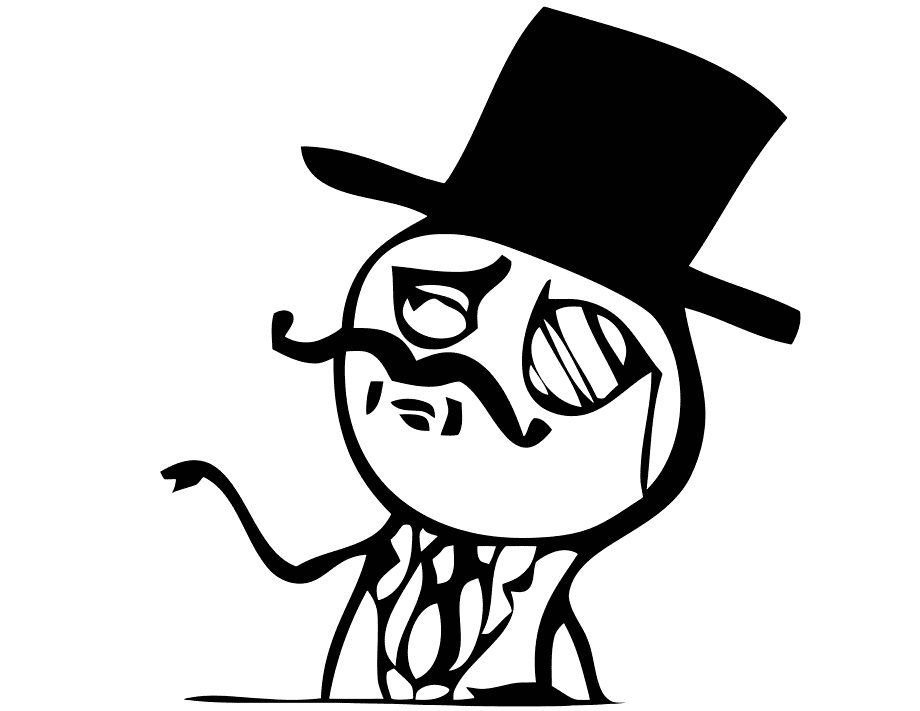

### Step 3: Conclusion

In conclusion, the process of fine-tuning the nanoGPT model involved iteratively adjusting various hyperparameters to improve the quality of the generated samples. We started with the baseline parameters provided in the repository, which served as our initial benchmark. However, the generated samples from the baseline model still lacked coherence and often contained nonsensical phrases.

To address this, we made successive modifications to the hyperparameters, such as increasing the batch size, block size, number of heads, layers, and dropout rate. These adjustments aimed to capture more complex patterns in the data and improve the model's ability to generate coherent English text.

The first attempt at fine-tuning resulted in improved loss values, indicating that the model was learning from the data more effectively. However, the generated samples still exhibited limited coherence and naturalness, resembling a language that was unfamiliar with English.

In the subsequent iteration, we further increased the batch size, block size, and the number of heads, layers, and dropout rate. This led to a longer training time of 17 minutes and 3 seconds. The generated samples showed some improvement in coherence and resemblance to English conversations, although they still fell short of being truly human-like.

Finally, we experimented with an even larger configuration by increasing the batch size to 64, block size to 256, and significantly increasing the number of heads and layers. This resulted in a substantial runtime of 2 hours, 32 minutes, and 5 seconds. The generated samples showed further improvement and started to resemble coherent English text, although they still contained occasional nonsensical phrases and lacked full fluency.

Overall, the process of fine-tuning the nanoGPT model involved a trade-off between runtime, model complexity, and the quality of generated samples. While there were notable improvements in the coherence and naturalness of the generated text, achieving truly human-like outputs still remains a challenge. Further fine-tuning and adjustments may be necessary to continue enhancing the model's performance and generate more accurate and fluent language, with more technological resources. Nothing personal with Jojie, she's probably working very, very hard.

## Generative AI Documentation

I used ChatGPT to:
- Articulate myself better
- Ask for more clarifications on things I wasn't sure of

## References 

1. Karpathy, A. (2023, January 17). Let's build GPT: from scratch, in code, spelled out [Video file]. Retrieved from https://www.youtube.com/watch?v=kCc8FmEb1nY
2. A beginner’s guide to language models. Built In. (n.d.). https://builtin.com/data-science/beginners-guide-language-models